<a href="https://colab.research.google.com/github/ibrahimrehman1/openCV_Tutorial_Google_Colab/blob/main/OpenCV_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

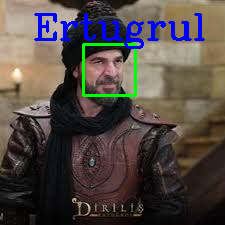

In [12]:
# import cv2
# from google.colab.patches import cv2_imshow
# import numpy as np

# ball = []
# out = cv2.VideoWriter("output.avi", cv2.VideoWriter_fourcc("M", "J", 'P', "G"), 10, (1920, 1080))
# cap = cv2.VideoCapture("./videos/video.mp4")
# while cap.isOpened():
#   ret, frame = cap.read()
#   if ret is False:
#     break

#   hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
#   lower_hue = np.array([21, 0, 0])
#   upper_hue = np.array([25, 255, 255])
#   mask = cv2.inRange(hsv, lower_hue, upper_hue)

#   (contours, _) = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
#   center = None

#   if len(contours) > 0:
#     c = max(contours, key=cv2.contourArea)
#     ((x, y), radius) = cv2.minEnclosingCircle(c)
#     M = cv2.moments(c)
#     try:
#       center = (int(M["m10"]/M["m00"]), int(M["m01"]/M["m00"]))
#       cv2.circle(frame, center, 10, (255, 0, 0), -1)
#       ball.append(center)

#     except:
#       pass

#     if len(ball) > 2:
#       for i in range(1, len(ball)):
#         cv2.line(frame, ball[i-1], ball[i], (0, 0, 255), 5)
#   out.write(frame)
# out.release()

# !git clone "https://github.com/misbah4064/face_recognition.git"

import cv2
import face_recognition
import numpy as np
from google.colab.patches import cv2_imshow

face_1 = face_recognition.load_image_file("./face_recognition/Donald Trump.jpg")
face_1_encoding = face_recognition.face_encodings(face_1)[0]
face_2 = face_recognition.load_image_file("./face_recognition/elon.jpg")
face_2_encoding = face_recognition.face_encodings(face_2)[0]
face_3 = face_recognition.load_image_file("./face_recognition/ertugrul.jpeg")
face_3_encoding = face_recognition.face_encodings(face_3)[0]


known_face_encodings = [
                        face_1_encoding,
                        face_2_encoding,
                        face_3_encoding
]

known_face_names = [
                    "Donald Trump",
                    "Elon Musk",
                    "Ertugrul"
]

filename = "./face_recognition/unknown_er.jpg"
unknown_image = face_recognition.load_image_file(filename)
unknown_image_to_draw = cv2.imread(filename)
face_locations = face_recognition.face_locations(unknown_image)
face_encodings = face_recognition.face_encodings(unknown_image, face_locations)
for (top, right, bottom, left), face_encoding in zip(face_locations, face_encodings):
  matches = face_recognition.compare_faces(known_face_encodings, face_encoding)
  name = "Unknown"
  face_distances = face_recognition.face_distance(known_face_encodings, face_encoding)
  best_match_index = np.argmin(face_distances)
  if matches[best_match_index]:
    name = known_face_names[best_match_index]

  cv2.rectangle(unknown_image_to_draw, (left, top), (right, bottom), (0, 255, 0), 2)
  cv2.putText(unknown_image_to_draw, name, (left-50, top - 5), cv2.FONT_HERSHEY_COMPLEX, 1.2, (255, 0, 0), 2)

cv2_imshow(unknown_image_to_draw)